In [1]:
#import libraries
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


import confusion_matrix2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

In [3]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_noise_67.csv")
test_data = pd.read_csv("../TestData/neodata/fault_all_noise_67.csv")
val_data = pd.read_csv("../ValidationData/neodata/fault_all_noise_67.csv")
#train_data.head()


In [4]:
# Scaling to zero mean and unit variance
Standard = StandardScaler()         # sklearn.preprocessing 

X_trn = Standard.fit_transform(train_data.drop(['target'],axis =1 ))
X_val = Standard.transform(val_data.drop(['target'],axis=1))
X_tst = Standard.transform(test_data.drop(['target'],axis =1 ))

Y_trn = np.ravel(train_data['target'])
Y_val = np.ravel(val_data['target'])
Y_tst = np.ravel(test_data['target'])



# Fittig the training data first

In [5]:
from sklearn import svm

clf = svm.SVC( kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf.fit(X_trn,Y_trn)

SVC(C=1000, decision_function_shape='ovo', gamma=0.01)

In [6]:
#predicting
Y_val_predict = clf.predict(X_val)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Validation data : Accuracy 81.177%'}, xlabel='Predicted class', ylabel='True class'>)

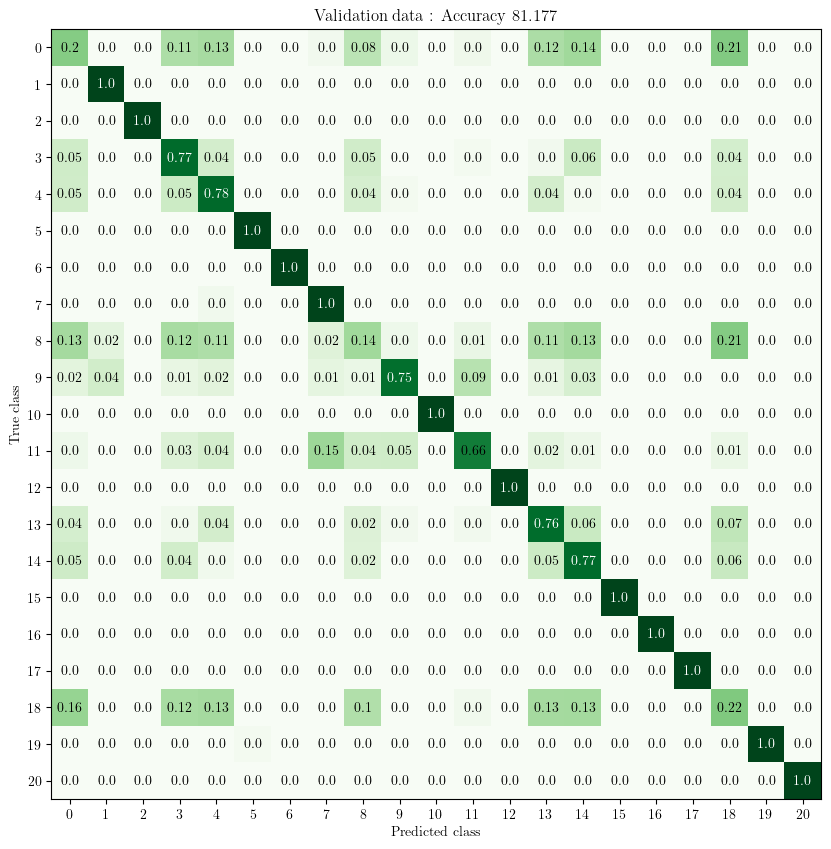

In [8]:
#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_trn, Y_val_predict, figsize = (10,10), save_fig_name = 'SVM_val.pdf', title = 'Validation data',eval_labels = False)

# Testing on validation data

In [7]:
Y_tst_predict = clf.predict(X_tst)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Test data : Accuracy 67.093%'}, xlabel='Predicted class', ylabel='True class'>)

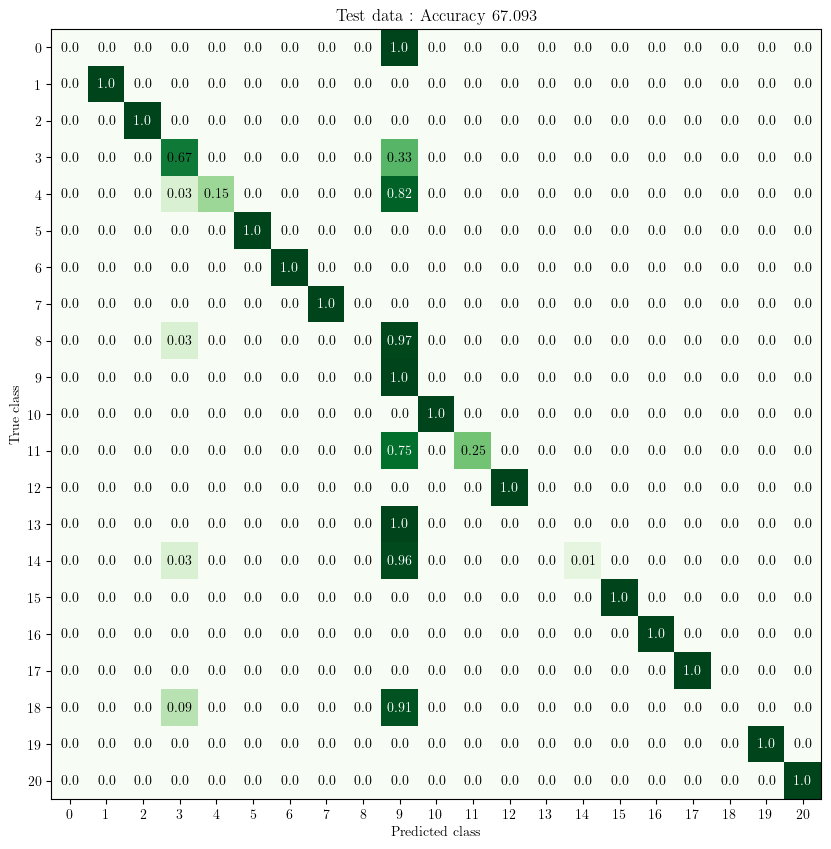

In [8]:
#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_tst,Y_tst_predict, figsize = (10,10), save_fig_name = 'SVM_test.pdf', title = 'Test data',eval_labels = False)